In [176]:
%pylab inline
from scipy import interpolate
from pywavan import powspec
import itertools
from scipy.stats import linregress
from pywavan import fan_trans


Populating the interactive namespace from numpy and matplotlib


In [180]:
n=10
p=1

'''
image size n x n with 'perturbance' "p"
returns image, matrix
where image is the n x n image and matrix is
an image cube of each scale of the image before summation
'''

total = 0
fmax=(2**(n))
imatrix = np.zeros((n-2,fmax,fmax))
coord=np.arange(fmax)
for i in range(2,n):
        f=(2**(i))
        a=(p**(i))
        randz=np.random.uniform(-1,1,size=(f,f))
    
        x=np.linspace(0,fmax-1,f)
        y=np.linspace(0,fmax-1,f)
        g=interpolate.RectBivariateSpline(y,x,randz)
        intmat=g(coord,coord)*a
        total=(intmat)+total
        imatrix[i-2,:,:]=intmat




In [226]:
n=10
p=1
'''
image size n x n with 'perturbance' "p"
returns image, matrix
where image is the n x n image and matrix is
an image cube of each scale of the image before summation
'''
total1 = 1
beta=2
fmax=(2**(n))
imatrix = np.zeros((n-2,fmax,fmax))
coord=np.arange(fmax)
for i in range(2,n):
        f=np.int((2**(i)*beta))
        a=(p**(i))
        randz=np.random.uniform(-1,1,size=(f,f))
    
        x=np.linspace(0,fmax-1,f)
        y=np.linspace(0,fmax-1,f)
        g=interpolate.RectBivariateSpline(y,x,randz)
        intmat=g(coord,coord)*a+2
        total1=(intmat)*total1
        imatrix[i-2,:,:]=intmat


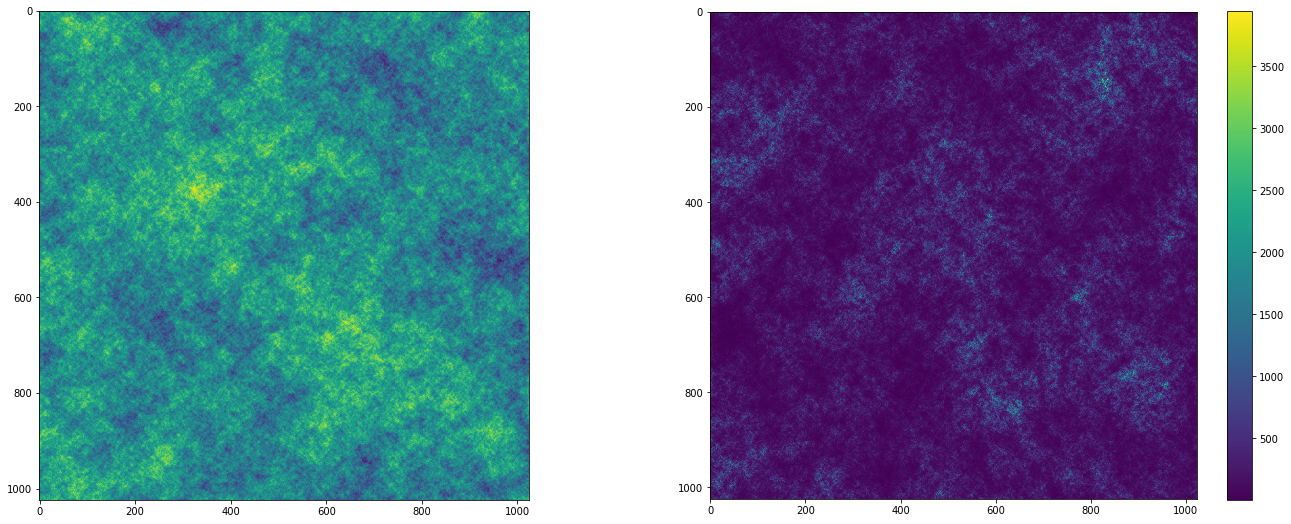

In [227]:
figure(figsize=(24,9))
plt.subplot(1,2,1)
imshow(total)
plt.subplot(1,2,2)
#imshow(total1,vmin=-0.1*10**-5,vmax=0.1*10**-5)
imshow(total1)
colorbar()



In [228]:
tab_k, spec_k = powspec(total, reso=1.)
tab_k1, spec_k1 = powspec(total1, reso=1.)


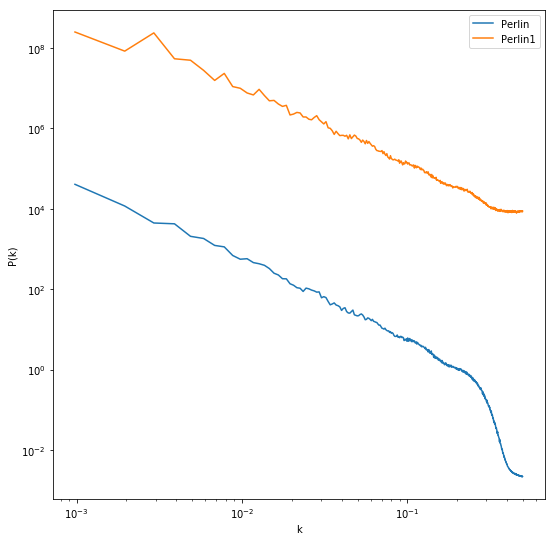

In [229]:
    figure(figsize=(30,9))
    plt.subplot(1,3,2)
    plot(tab_k, spec_k, label='Perlin')
    plt.subplot(1,3,2)
    plot(tab_k1, spec_k1, label='Perlin1')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend()

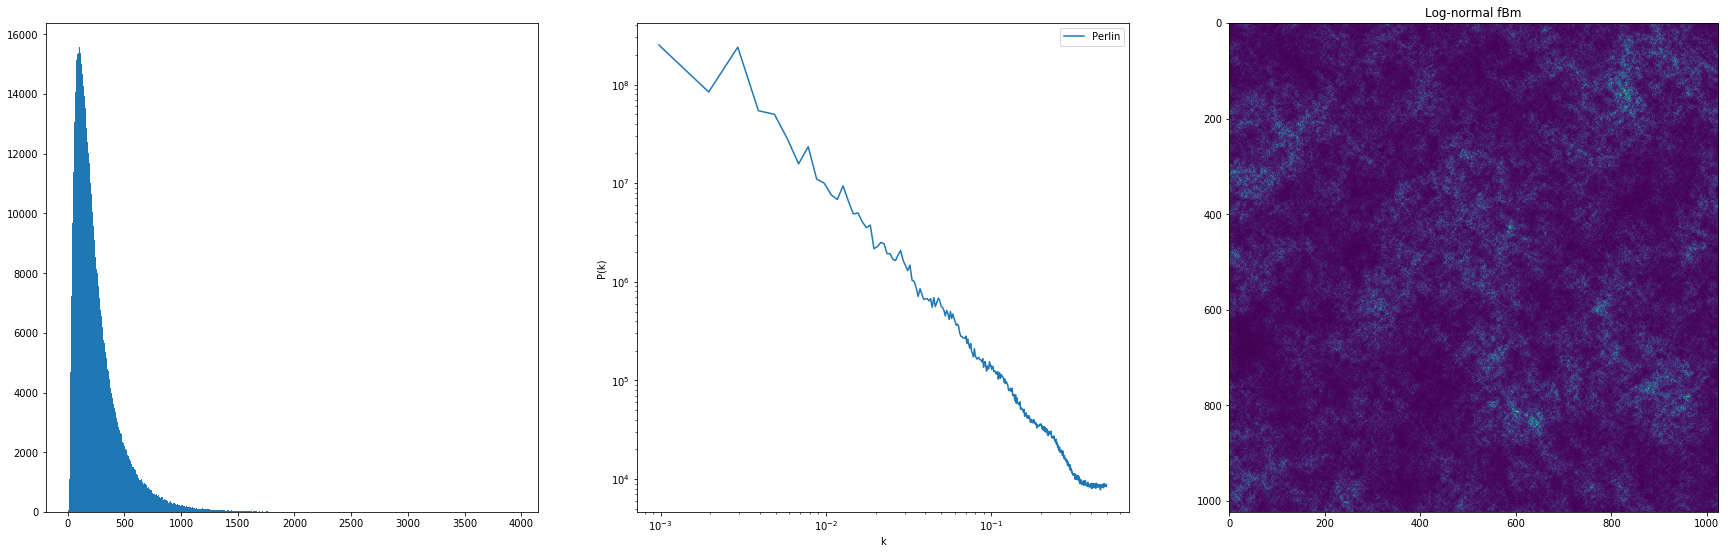

In [230]:
    mergedp=list(itertools.chain.from_iterable(total1))
    
    figure(figsize=(30,9))
    plt.subplot(1,3,1)
    plt.hist(mergedp,bins='auto', label='Log-normal fBm')
    plt.subplot(1,3,2)
    plot(tab_k1, spec_k1, label='Perlin')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend()
    plt.subplot(1,3,3)
    imshow(total1)
    plt.title('Log-normal fBm')
    plt.show()

In [231]:
    #Calculate the power spectrum of the total image
    tab_kfb, spec_kfb= powspec(total1, reso=1.)

    #Calculate the Fan wavelet transforms
    #wtlog, S11a, wav_k, S1a, q = fan_trans(logfbm, reso=1, q=0, qdyn=False)

    #Set a list of q that are all starting at 2.5
    #The q parameter sets the "sensitivity" to non-Gaussianities in a distribution
    wtfb, S11a, wav_kfb, S1afb, q = fan_trans(total1, reso=1, q=0, qdyn=True, skewl=0.4)
    M=np.size(wav_kfb)
    
    q=[]
    q=[2.9]*M
    #Wavelet power spectrum where the q parameter is dynamic and will converge
    #to its optimal value as a function of scales and angles according to the skewness
    #of the wavelet coefficients distribution.
    #wtm, S11a, wav_km, S1am, q = fan_trans(fbmm, reso=1, q=q, qdyn=True, skewl=0.4)
    wtfb, S11a, wav_kfb, S1afb, q = fan_trans(total1, reso=1, q=q, qdyn=True, skewl=0.4)

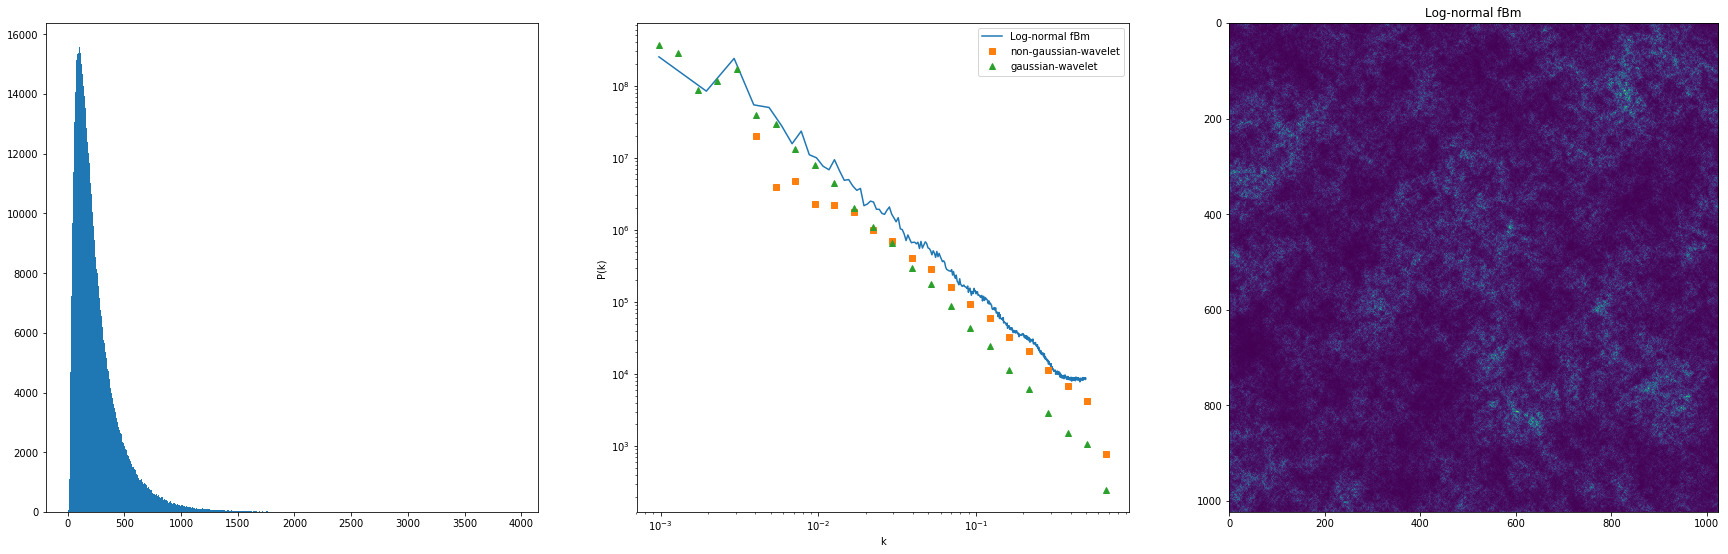

In [232]:
    figure(figsize=(30,9))
    plt.subplot(1,3,1)
    plt.hist(mergedp,bins='auto', label='Log-normal fBm')
    plt.subplot(1,3,2)
    plot(tab_kfb, spec_kfb, label='Log-normal fBm')
    plot(wav_kfb, S1afb[1,:], 's', label='non-gaussian-wavelet')
    plot(wav_kfb, S1afb[2,:], '^', label='gaussian-wavelet')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend()
    plt.subplot(1,3,3)
    imshow(total1)
    plt.title('Log-normal fBm')
    plt.show()